1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

## First, import the necessary libraries

In [83]:
import pandas as pd 
import numpy as np

from sklearn import metrics, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt 
import seaborn as sns

### Load the dataset

In [84]:
iris_df = pd.read_csv(r'/Users/IAmLeoSanchez/Documents/Data_Science/The_Bridge/GIT_HUB_LEO/Data_Science_Bootcamp_Leo/data_science_nov_20_leo/week8/day5/data/iris.csv')
iris_df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
85,6.0,3.4,4.5,1.6,Versicolor
10,5.4,3.7,1.5,0.2,Setosa
38,4.4,3.0,1.3,0.2,Setosa
124,6.7,3.3,5.7,2.1,Virginica
130,7.4,2.8,6.1,1.9,Virginica


In [85]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Convert string labels into numbers for categorical modeling

In [86]:
le = preprocessing.LabelEncoder()
variety_encoded = le.fit_transform(iris_df['variety'])

# 0: Setosa, 1: Versicolor, 2: Virginica
print('Variety column encoded:\n', variety_encoded)

Variety column encoded:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [87]:
le.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

### Visualize the data using sns.pairplot

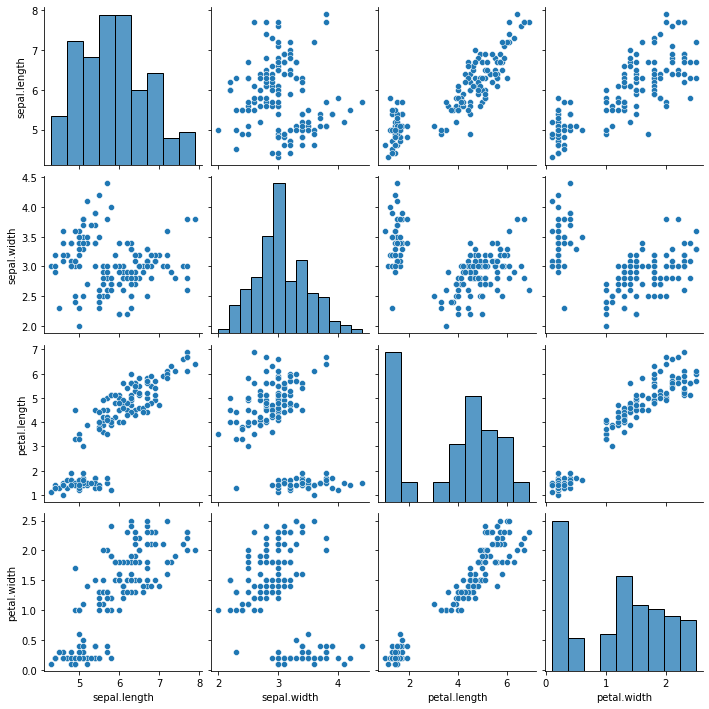

In [88]:
sns.pairplot(iris_df)

### Define the __features__ and the __target__

In [89]:
# X --> Features
X = np.array(iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# y --> The Target
y = np.array(variety_encoded)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 4)
y shape: (150,)


### Splitting the data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

print('X_train shape:\t', X_train.shape)
print('X_test shape:\t', X_test.shape)

X_train shape:	 (120, 4)
X_test shape:	 (30, 4)


### Generating the model

In [91]:
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier(n_neighbors=3)
model_7 = KNeighborsClassifier(n_neighbors=7)

#Train the model using training sets
model_3.fit(X_train, y_train)
model_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [92]:
#Predict output

#First
# [15.7,2.8,9.5,0.1]
predicted_3_first = model_3.predict([[15.7,2.8,9.5,0.1]])
predicted_7_first = model_7.predict([[15.7,2.8,9.5,0.1]])

#Both of them predicted Virginica
print('First prediction with K=3:', predicted_3_first)
print('\nFirst prediction with K=7:', predicted_7_first)

print('\n---------------\n')
#Second
# [1.7,3.8,4.5,11.3]

predicted_3_second = model_3.predict([[1.7,3.8,4.5,11.3]])
predicted_7_second = model_7.predict([[1.7,3.8,4.5,11.3]])

#Once again, Virginica was predicted
print('Second prediction with K=3:', predicted_3_second)
print('\nSecond prediction with K=7:', predicted_7_second)

First prediction with K=3: [2]

First prediction with K=7: [2]

---------------

Second prediction with K=3: [2]

Second prediction with K=7: [2]


In [93]:
score_model_3 = round((model_3.score(X_test, y_test) * 100), 2)
score_model_7 = round((model_7.score(X_test, y_test) * 100), 2)

print('Model score over the test set when K=3:', score_model_3, '%')
print('\nModel score over the test set when K=7:', score_model_7, '%')

Model score over the test set when K=3: 90.0 %

Model score over the test set when K=7: 93.33 %


### Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.

When K=3

([<matplotlib.axis.YTick at 0x7ffbfbaa7730>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

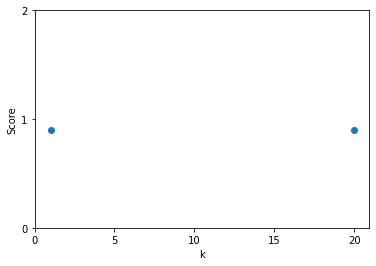

In [94]:
k_range = (1, 20)
scores = []
for k in k_range:
    model_3.fit(X_train, y_train)
    scores.append(model_3.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Score')
plt.scatter(k_range, scores)
plt.xticks(range(0, 21, 5))
plt.yticks([0, 1, 2])

When K=7

([<matplotlib.axis.YTick at 0x7ffbf9380220>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

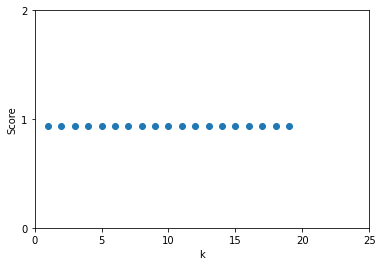

In [95]:
k_range = range(1, 20)
scores = []
for k in k_range:
    model_7.fit(X_train, y_train)
    scores.append(model_7.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Score')
plt.scatter(k_range, scores)
plt.xticks(range(0, 30, 5))
plt.yticks([0, 1, 2])

([<matplotlib.axis.XTick at 0x7ffbfbcd27f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

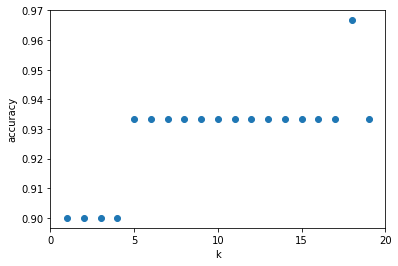

In [96]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### Con k=7 en un rango (1,20) se encuentran muchos más valores cuando K=7 que cuando K=3, porque con ese valor de K el modelo tiene más información.

### Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.6)

print('X_train shape:\t', X_train.shape)
print('X_test shape:\t', X_test.shape)

X_train shape:	 (60, 4)
X_test shape:	 (90, 4)


In [98]:
model_3.fit(X_train, y_train)
model_7.fit(X_train, y_train)

model_3.predict(X_test)
model_7.predict(X_test)

model_3_score_new = round((model_3.score(X_test, y_test) *100), 2)
model_7_score_new = round((model_7.score(X_test, y_test) *100), 2)

print('New model with K=3 score:', model_3_score_new, '%')
print('New model with K=7 score:', model_7_score_new, '%')

New model with K=3 score: 98.89 %
New model with K=7 score: 97.78 %


In [99]:
#First
# [15.7,2.8,9.5,0.1]
predicted_3_first_new = model_3.predict([[15.7,2.8,9.5,0.1]])
predicted_7_first_new = model_7.predict([[15.7,2.8,9.5,0.1]])

#Both of them predicted Virginica
print('First prediction with K=3:', predicted_3_first_new)
print('\nFirst prediction with K=7:', predicted_7_first_new)

print('\n---------------\n')
#Second
# [1.7,3.8,4.5,11.3]

predicted_3_second_new = model_3.predict([[1.7,3.8,4.5,11.3]])
predicted_7_second_new = model_7.predict([[1.7,3.8,4.5,11.3]])

#Once again, Virginica was predicted
print('Second prediction with K=3:', predicted_3_second_new)
print('\nSecond prediction with K=7:', predicted_7_second_new)

First prediction with K=3: [2]

First prediction with K=7: [2]

---------------

Second prediction with K=3: [2]

Second prediction with K=7: [2]


## Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [100]:
new_iris_df = iris_df[iris_df.variety != 'Setosa']
new_iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


In [101]:
variety_encoded_new = le.fit_transform(new_iris_df.variety)

#0: Versicolor,, 1: Virginica
variety_encoded_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
# X --> Features
X = np.array(new_iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# y --> The Target
y = np.array(variety_encoded_new)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (100, 4)
y shape: (100,)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

print('X_train shape:\t', X_train.shape)
print('X_test shape:\t', X_test.shape)

X_train shape:	 (80, 4)
X_test shape:	 (20, 4)


In [104]:
model_3.fit(X_train, y_train)
model_7.fit(X_train, y_train)

model_3.predict(X_test)
model_7.predict(X_test)

model_3_score_new = round((model_3.score(X_test, y_test) *100), 2)
model_7_score_new = round((model_7.score(X_test, y_test) *100), 2)

print('New model with K=3 score:', model_3_score_new, '%')
print('New model with K=7 score:', model_7_score_new, '%')

New model with K=3 score: 100.0 %
New model with K=7 score: 100.0 %


In [105]:
#First
# [15.7,2.8,9.5,0.1]
predicted_3_first_final = model_3.predict([[15.7,2.8,9.5,0.1]])
predicted_7_first_final = model_7.predict([[15.7,2.8,9.5,0.1]])

#Both of them predicted Virginica
print('First prediction with K=3:', predicted_3_first_final)
print('\nFirst prediction with K=7:', predicted_7_first_final)

print('\n---------------\n')
#Second
# [1.7,3.8,4.5,11.3]

predicted_3_second_final = model_3.predict([[1.7,3.8,4.5,11.3]])
predicted_7_second_final = model_7.predict([[1.7,3.8,4.5,11.3]])

#Once again, Virginica was predicted
print('Second prediction with K=3:', predicted_3_second_final)
print('\nSecond prediction with K=7:', predicted_7_second_final)

First prediction with K=3: [1]

First prediction with K=7: [1]

---------------

Second prediction with K=3: [1]

Second prediction with K=7: [1]


([<matplotlib.axis.YTick at 0x7ffbfbdbeeb0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

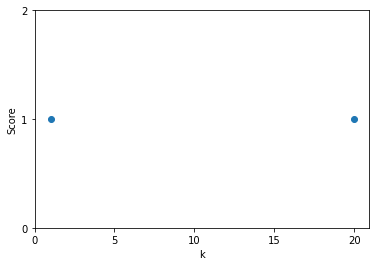

In [106]:
k_range = (1, 20)
scores = []
for k in k_range:
    model_3.fit(X_train, y_train)
    scores.append(model_3.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Score')
plt.scatter(k_range, scores)
plt.xticks(range(0, 21, 5))
plt.yticks([0, 1, 2])

([<matplotlib.axis.YTick at 0x7ffbfbb85a00>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

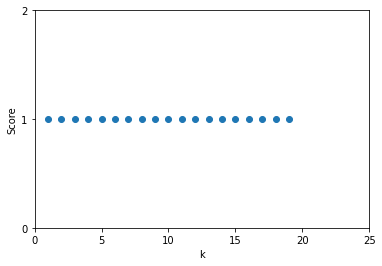

In [107]:
k_range = range(1, 20)
scores = []
for k in k_range:
    model_7.fit(X_train, y_train)
    scores.append(model_7.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Score')
plt.scatter(k_range, scores)
plt.xticks(range(0, 30, 5))
plt.yticks([0, 1, 2])

([<matplotlib.axis.XTick at 0x7ffbfbf8a880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

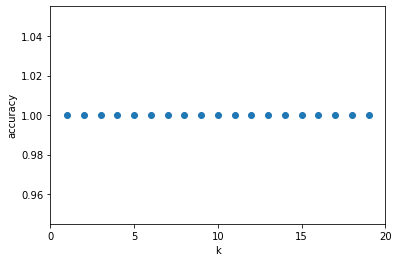

In [108]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [ ]:
### knn es un buen algoritmo para este tipo de datos porque, al ser no paramétrico, no hace ningún tipo de asunción sobre cómo están distribuidos, lo que, en términos prácticos, suele ser más efectivo

## Es efectivo también para datos no lineales, como es este caso

## Hay que tener en cuenta que estas bases de datos son de ejemplo y suelen estar muy bien estructuradas y depuradas para practicar esta clase de ejercicios.

## Entre las principales desventajas de Kneighbors se encuentra el hecho de que el modelo utiliza todos los datos para hacer predicciones, por lo que puede llevar más tiempo del esperado.

Documentos de interés: [KNN](https://blog.usejournal.com/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)